In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
from generic.latexify import *

In [2]:
from visualization.settings import *
from visualization.helpers import *
from visualization.vis_pipeline import *

In [3]:
# import os
# print(os.listdir('cached_values/outputs'))

In [4]:
# output_files = ['cached_values/outputs/outputs_rebalanced_stv_TX.csv']
# output_files = ['cached_values/outputs/outputs_rebalanced_partisan_stv_CA.csv']

output_files = ['cached_values/outputs/outputs_rebalanced_CA.csv']

In [5]:
df = load_outputs(output_files)#, nrows = 100000)

The following are often expected to have multiple values in the same plot
N_districts                       26
voting_method                      3
optimization_voting_method_for     3
optimization                       4
party_optimized_for                2
dtype: int64


In [6]:
for col in ['state', 'N_districts', 'voting_method', 'optimization']:
    print(col, df[col].unique())

state ['CA']
N_districts [ 1 10 12 14 16 18 20 23 26  2  3  4 53  5  6  7  9  8 29 32 35 38 41 44
 47 50]
voting_method ['thiele_approvalindependent' 'thiele_pav' 'thiele_squared']
optimization ['single_district_for_state' 'subsampled' 'fair' 'unfair']


In [7]:
df.groupby(['state', 'N_districts', 'voting_method', 'optimization'])['map_hash'].count()

state  N_districts  voting_method               optimization             
CA     1            thiele_approvalindependent  single_district_for_state        1
                    thiele_pav                  single_district_for_state        1
                    thiele_squared              single_district_for_state        1
       2            thiele_approvalindependent  subsampled                    1588
                    thiele_pav                  subsampled                    1588
                                                                             ...  
       53           thiele_pav                  subsampled                   13606
                                                unfair                          69
                    thiele_squared              fair                            48
                                                subsampled                   13606
                                                unfair                          69
Name: map_has

In [8]:
print(df.columns)
print(df.shape)

Index(['overall_hash', 'map_hash', 'settings_hash', 'state', 'state_num',
       'N_districts', 'VOTER_RAW_FILENAME', 'N_VOTERS', 'FEATURE_COLS',
       'GROUP_COL', 'LOADING_FROM_DATA', 'fraction_voters_Republican',
       'fraction_voters_Democrat', 'fraction_winners_Republican',
       'fraction_winners_Democrat', 'medians', 'total_voters', 'total_winners',
       'cohesion_income_Democrat', 'cohesion_income_Republican',
       'cohesion_income', 'cohesion_partisan_score_Democrat',
       'cohesion_partisan_score_Republican', 'cohesion_partisan_score',
       'cohesion_education_Democrat', 'cohesion_education_Republican',
       'cohesion_education', 'cohesion_racial_Democrat',
       'cohesion_racial_Republican', 'cohesion_racial',
       'cohesion_geographic_Democrat', 'cohesion_geographic_Republican',
       'cohesion_geographic', 'run_label', 'voting_method', 'runtime',
       'optimization', 'number', 'optimization_voting_method_for',
       'party_optimized_for'],
      dtype=

In [9]:
df.state.unique()

array(['CA'], dtype=object)

In [10]:
from evaluations.for_visualization import calculate_polarization
df['polarization'] = df.medians.apply(lambda x: calculate_polarization(eval(x)))

# Plot

In [11]:
df

overall_hash  \
0       93e664929b102339c9936c1c4393564d4bac558b7e220f...   
1       93e664929b102339c9936c1c4393564d10d0760e3fa5b0...   
2       93e664929b102339c9936c1c4393564d1a12c4c77c5e8e...   
3       93e664929b102339c9936c1c4393564deb1e04798b8444...   
4       93e664929b102339c9936c1c4393564dd7acd73d29f3e8...   
...                                                   ...   
566626  93e664929b102339c9936c1c4393564db2352f4faa46ab...   
566627  93e664929b102339c9936c1c4393564de4383920075bec...   
566628  93e664929b102339c9936c1c4393564de4383920075bec...   
566629  93e664929b102339c9936c1c4393564de4383920075bec...   
566630  93e664929b102339c9936c1c4393564d20d19da8d22dc3...   

                                map_hash                     settings_hash  \
0       4bac558b7e220fc86c190f30c5829269  93e664929b102339c9936c1c4393564d   
1       10d0760e3fa5b01bf65392b86476e059  93e664929b102339c9936c1c4393564d   
2       1a12c4c77c5e8e047d0470705e270758  93e664929b102339c9936c1c4393564d   
3       eb1e04798b8444cbf02a466d5f7efc75  93e664929b102339c9936c1c4393564d   
4       d7acd73d29f3e8268054598b2a7c4815  93e664929b102339c9936c1c4393564d   
...                                  ...                               ...   
566626  b2352f4faa46ab9994e6d33f86a16d1c  93e664929b102339c9936c1c4393564d   
566627  e4383920075bec59c93ce32a8c33b9a9  93e664929b102339c9936c1c4393564d   
566628  e4383920075bec59c93ce32a8c33b9a9  93e664929b102339c9936c1c4393564d   
566629  e4383920075bec59c93ce32a8c33b9a9  93e664929b102339c9936c1c4393564d   
566630  20d19da8d22dc30445dcd0a8466f334a  93e664929b102339c9936c1c4393564d   

       state  state_num  N_districts  \
0         CA          6            1   
1         CA          6           10   
2         CA          6           10   
3         CA          6           10   
4         CA          6           10   
...      ...        ...          ...   
566626    CA          6           50   
566627    CA          6           50   
566628    CA          6           50   
566629    CA          6           50   
566630    CA          6           50   

                                       VOTER_RAW_FILENAME  N_VOTERS  \
0       data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
1       data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
2       data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
3       data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
4       data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
...                                                   ...       ...   
566626  data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
566627  data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
566628  data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
566629  data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   
566630  data/fullUS_individuals_with_FIP_6M_balanced_a...     20000   

                  FEATURE_COLS GROUP_COL  ...  cohesion_geographic_Republican  \
0       ['dem_partisan_score']     party  ...                             NaN   
1       ['dem_partisan_score']     party  ...                             NaN   
2       ['dem_partisan_score']     party  ...                   -31303.477664   
3       ['dem_partisan_score']     party  ...                             NaN   
4       ['dem_partisan_score']     party  ...                             NaN   
...                        ...       ...  ...                             ...   
566626  ['dem_partisan_score']     party  ...                   -44882.616320   
566627  ['dem_partisan_score']     party  ...                   -40297.387978   
566628  ['dem_partisan_score']     party  ...                   -38046.590772   
566629  ['dem_partisan_score']     party  ...                   -42508.709677   
566630  ['dem_partisan_score']     party  ...                   -42508.709677   

        cohesion_geographic           run_label               voting

thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


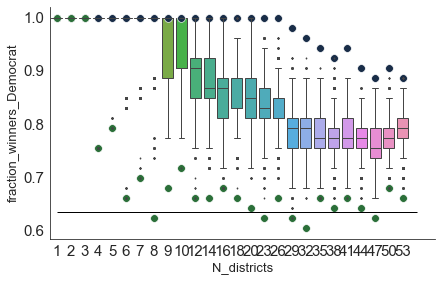

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


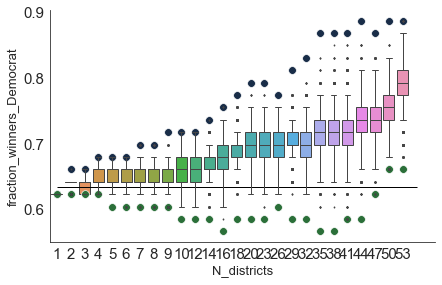

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


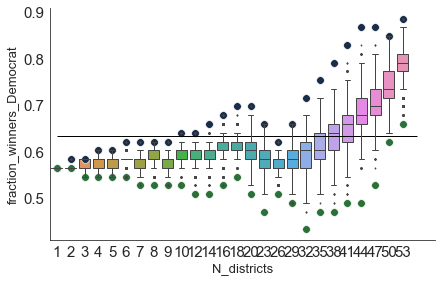

polarization
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


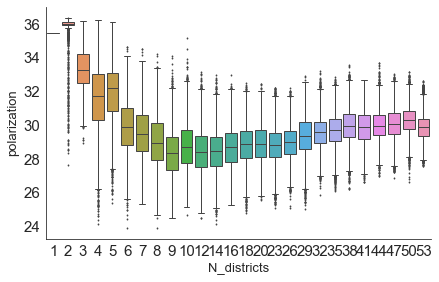

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


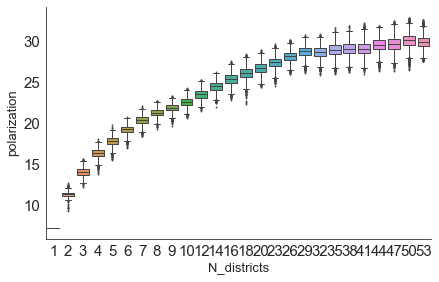

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


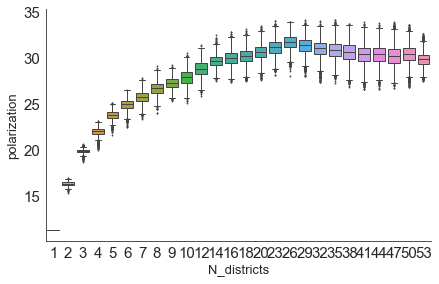

geographic
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


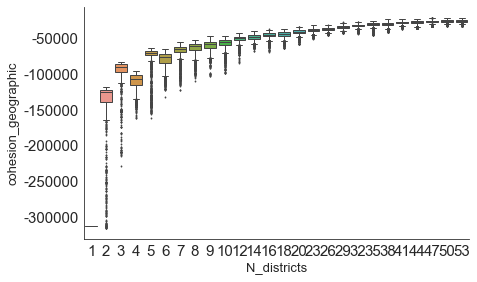

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


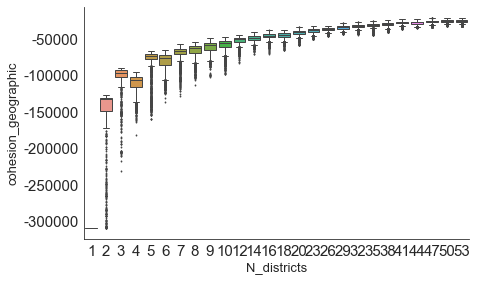

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


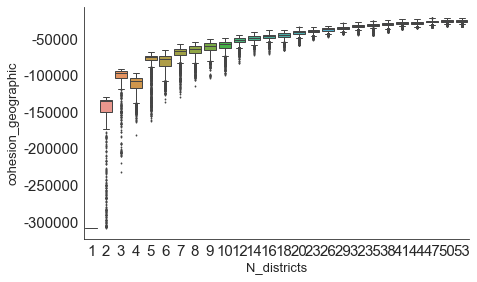

geographic Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


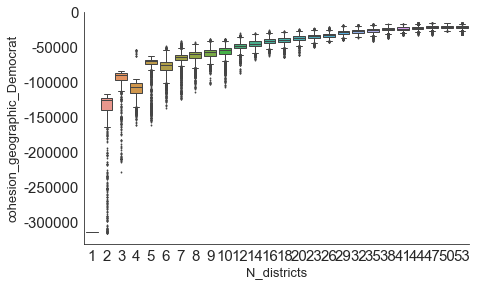

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


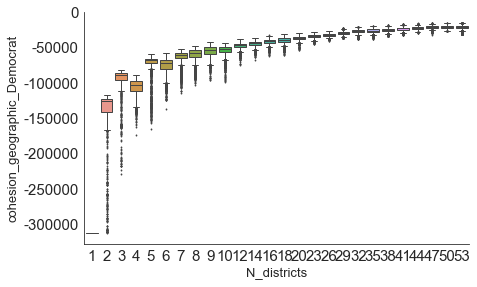

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


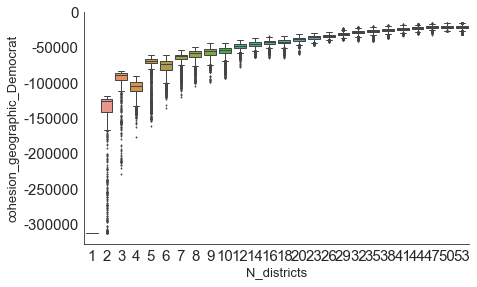

geographic Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


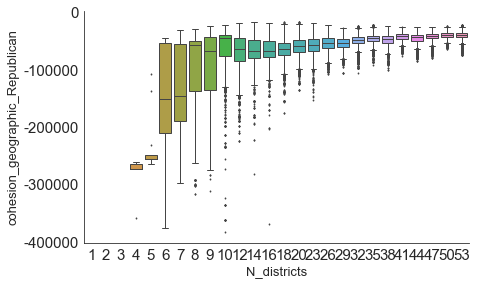

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


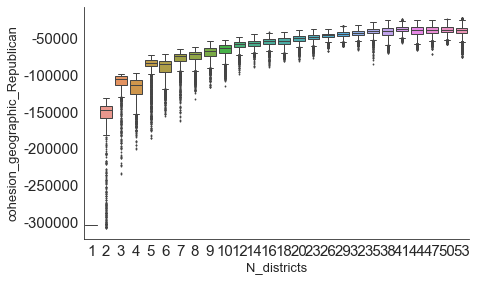

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


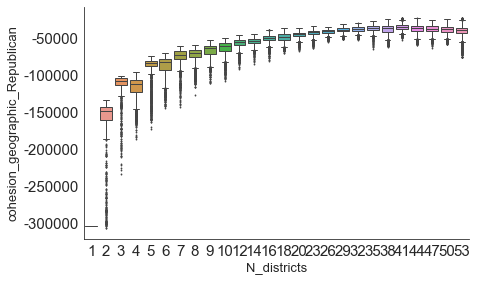

partisan_score
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


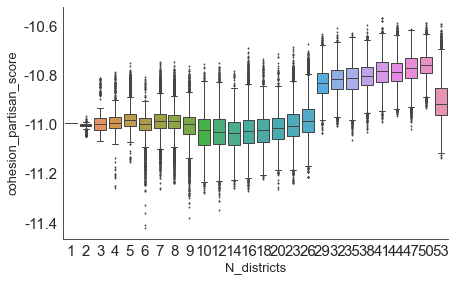

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


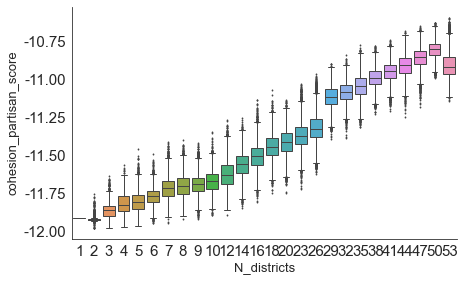

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


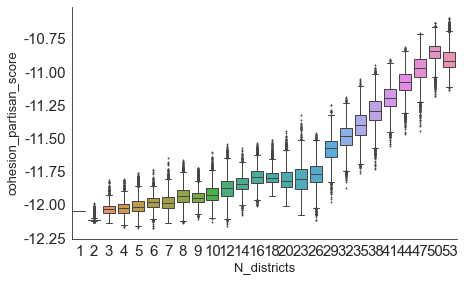

partisan_score Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


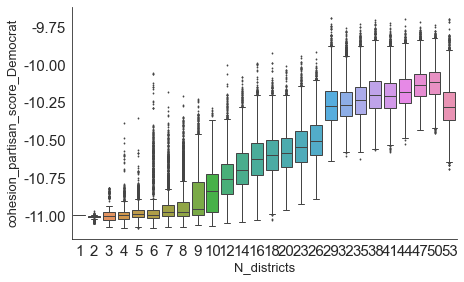

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


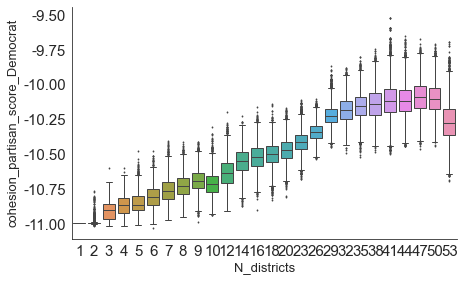

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


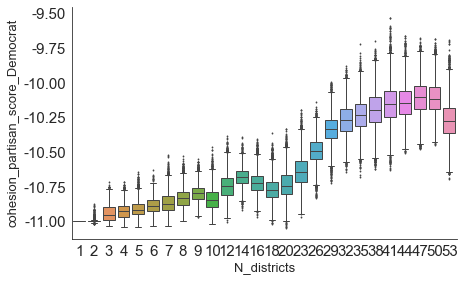

partisan_score Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


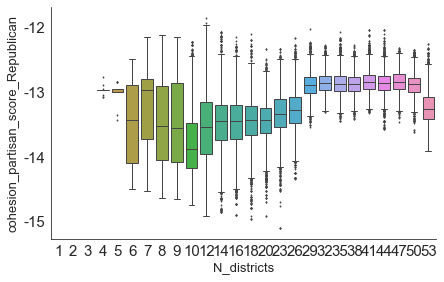

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


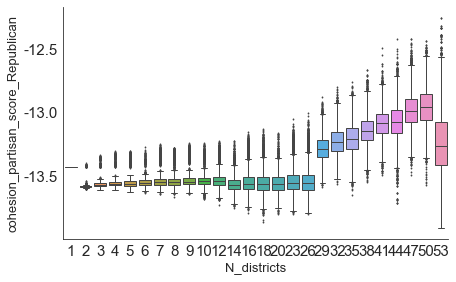

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


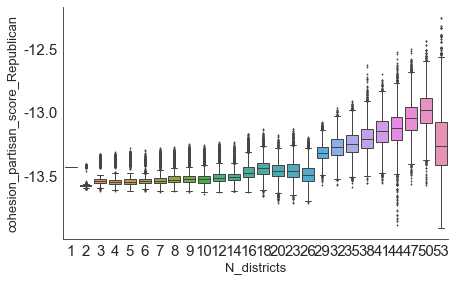

racial
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


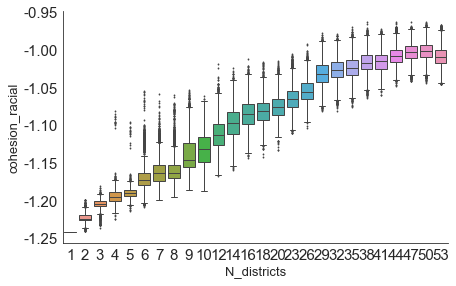

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


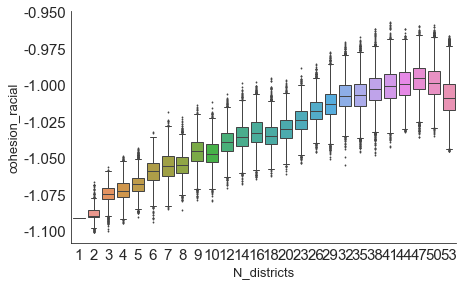

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


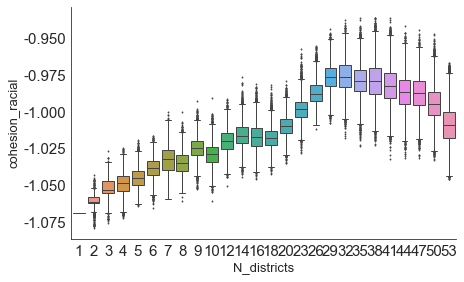

racial Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


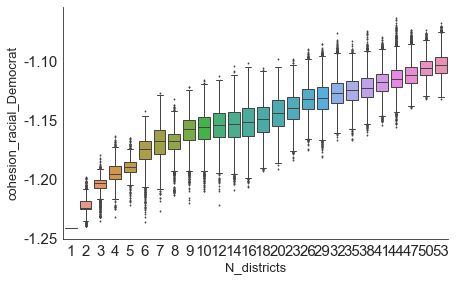

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


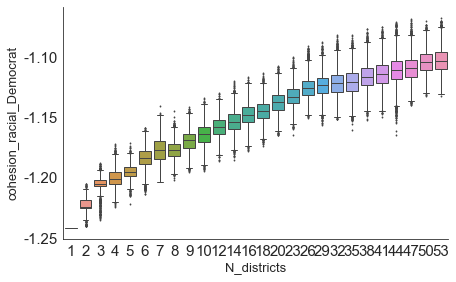

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


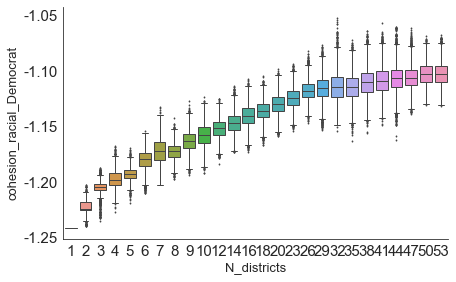

racial Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


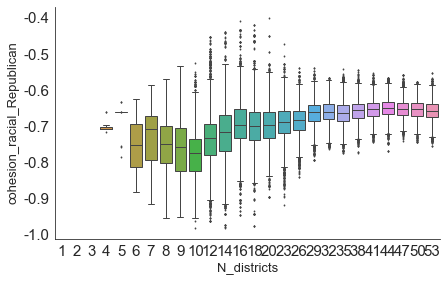

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


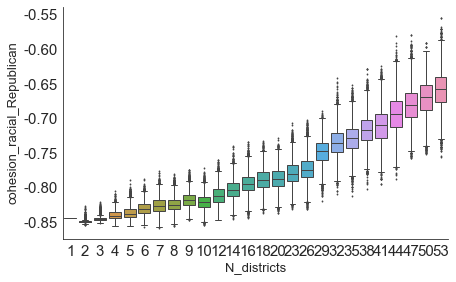

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


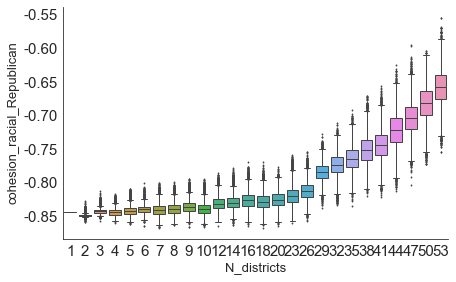

education
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


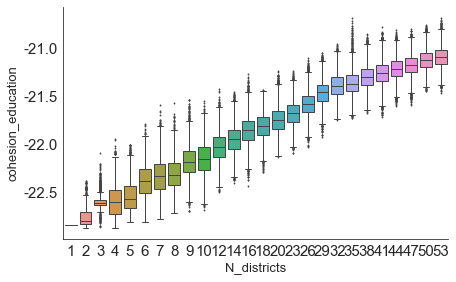

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


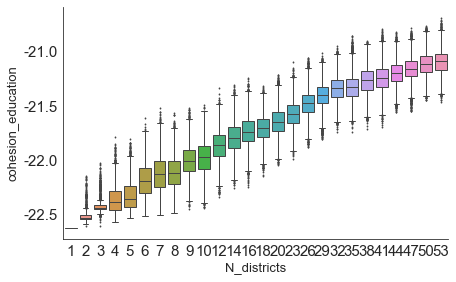

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


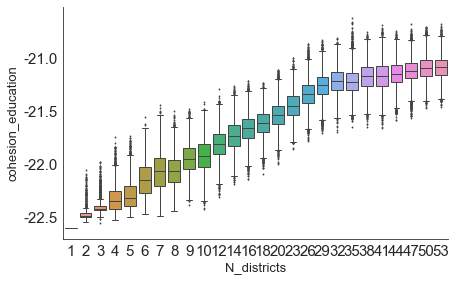

education Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


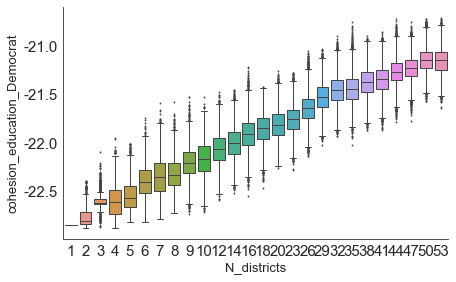

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


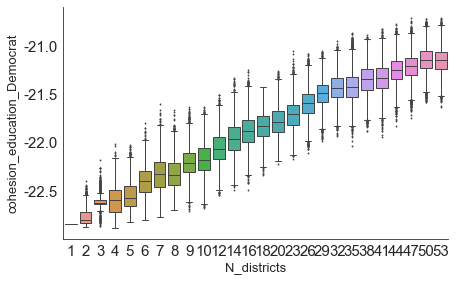

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


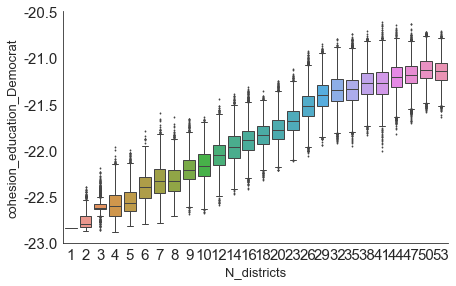

education Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


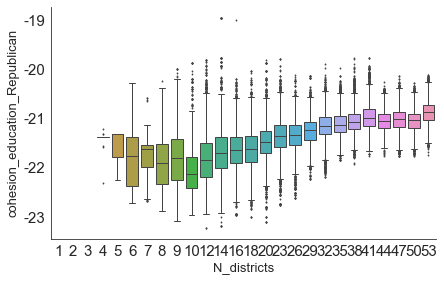

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


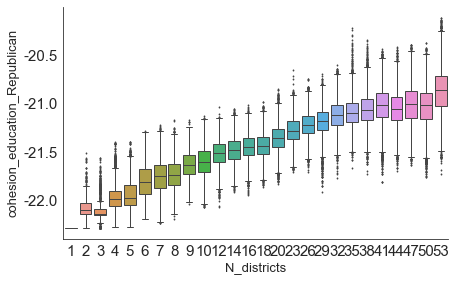

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


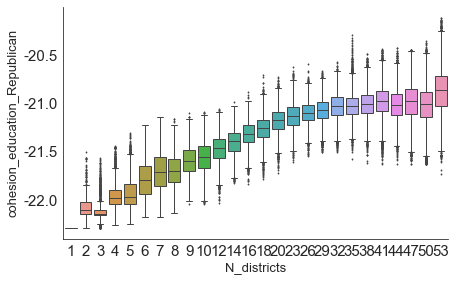

income
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


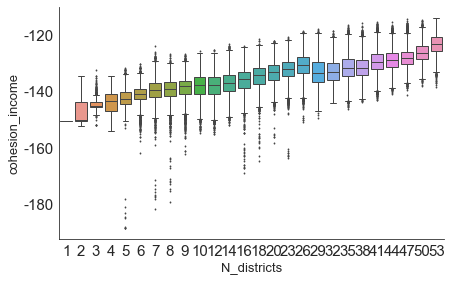

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


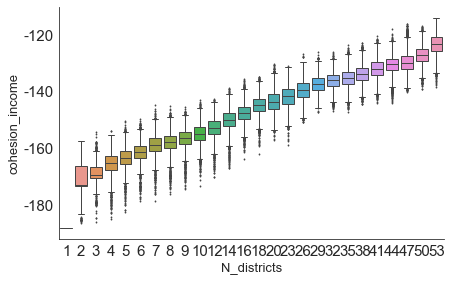

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


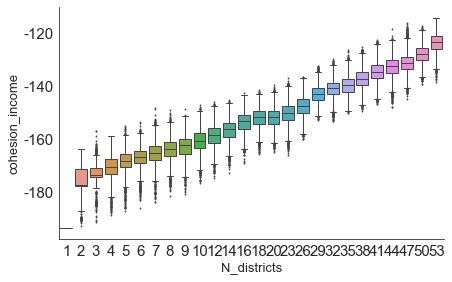

income Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


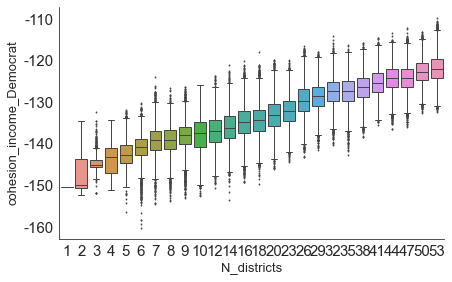

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


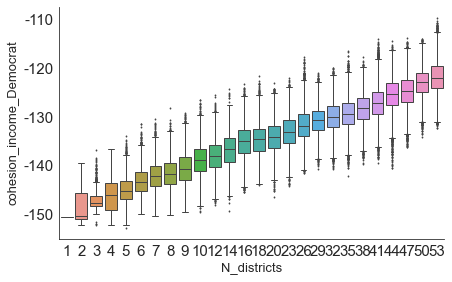

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


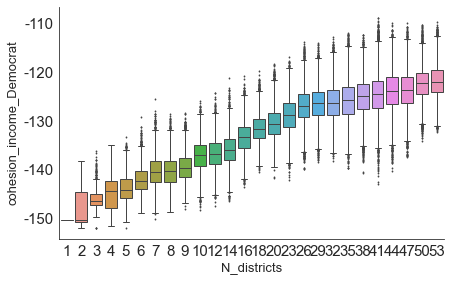

income Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


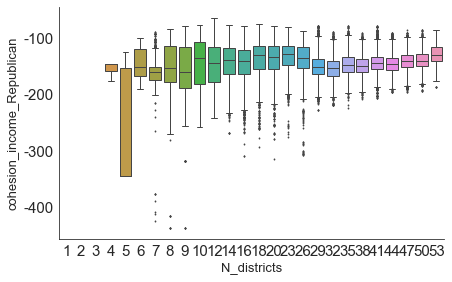

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


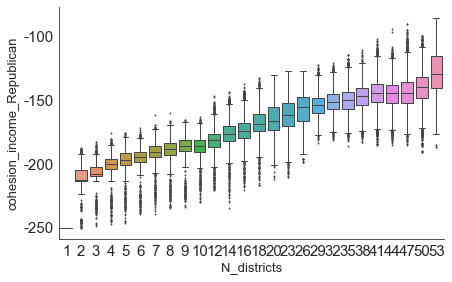

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


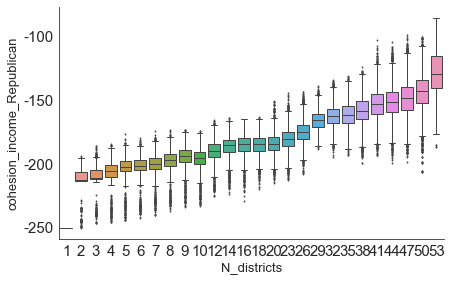

In [11]:
plot_all_for_one_state(df, 'CA')

In [12]:
plot_all_for_one_state(df, 'PA')

polarization
geographic
geographic Democrat
geographic Republican
partisan_score
partisan_score Democrat
partisan_score Republican
racial
racial Democrat
racial Republican
education
education Democrat
education Republican
income
income Democrat
income Republican


In [13]:
plot_all_for_one_state(df, 'OH')

polarization
geographic
geographic Democrat
geographic Republican
partisan_score
partisan_score Democrat
partisan_score Republican
racial
racial Democrat
racial Republican
education
education Democrat
education Republican
income
income Democrat
income Republican


thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


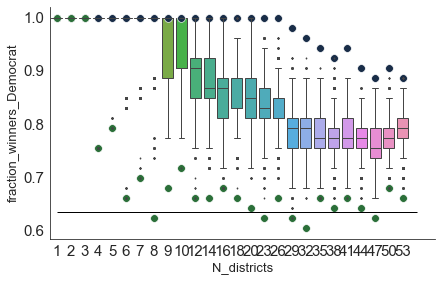

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


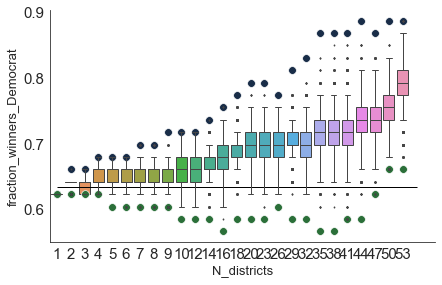

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


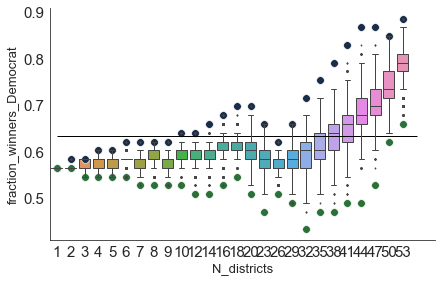

polarization
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


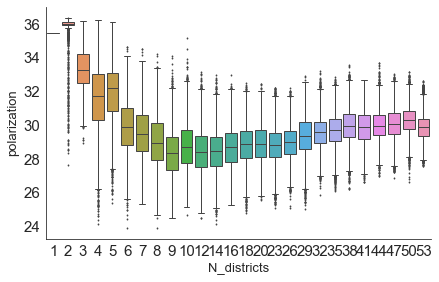

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


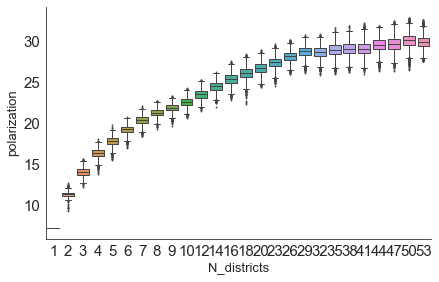

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


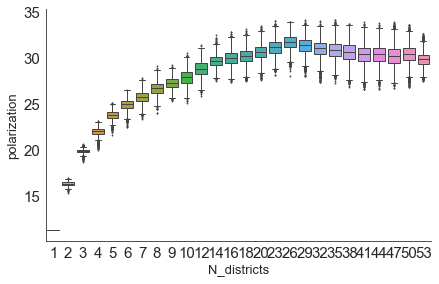

geographic
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


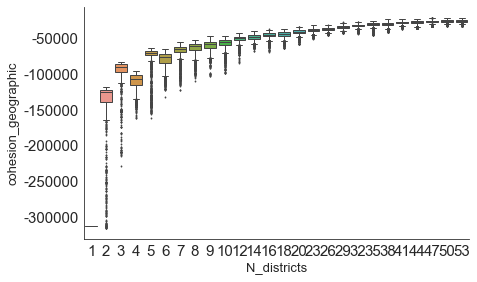

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


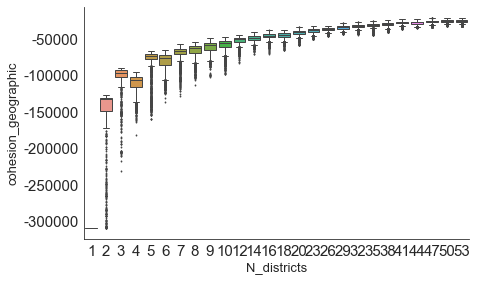

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


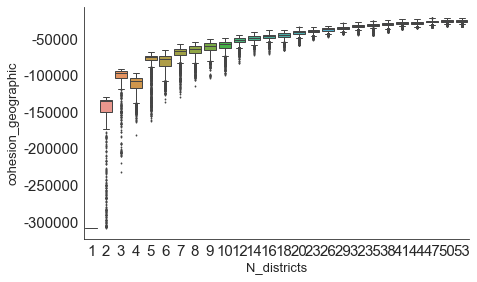

geographic Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


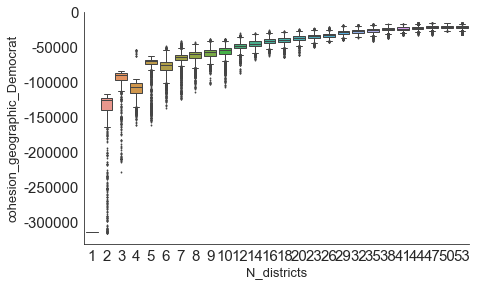

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


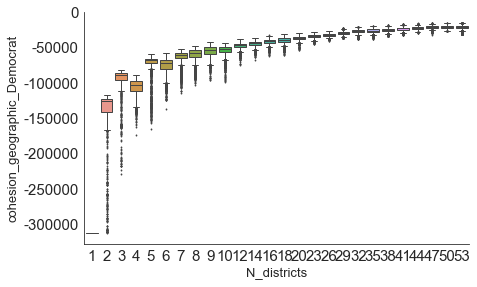

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


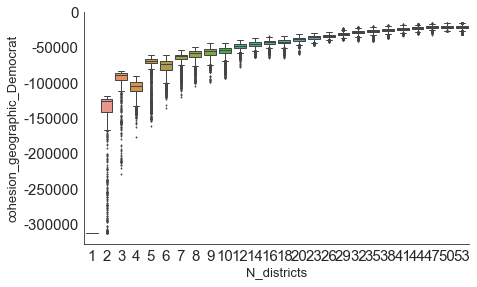

geographic Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


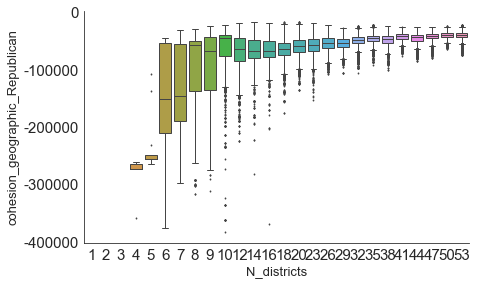

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


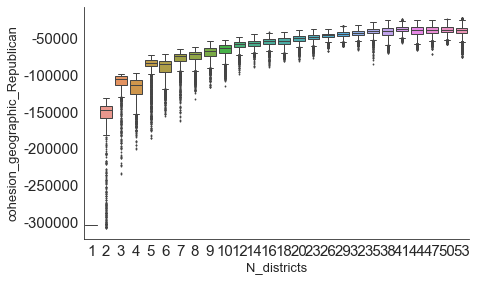

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


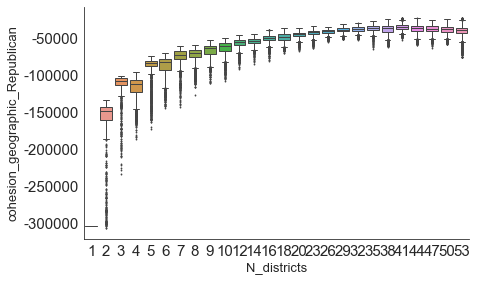

partisan_score
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


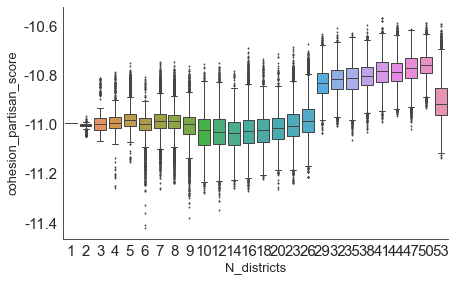

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


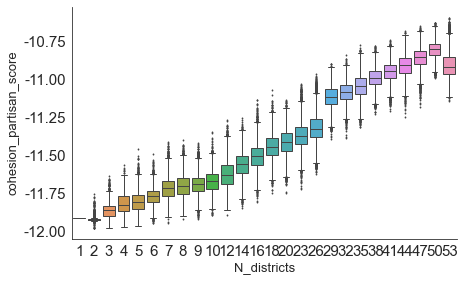

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


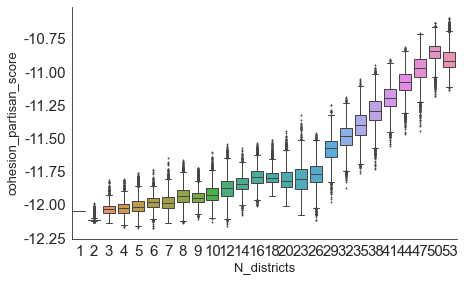

partisan_score Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


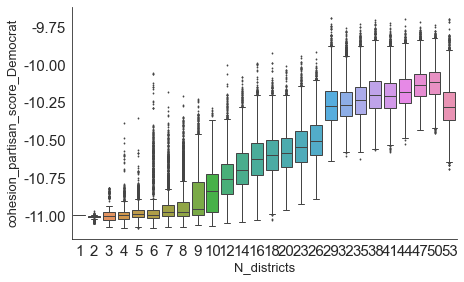

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


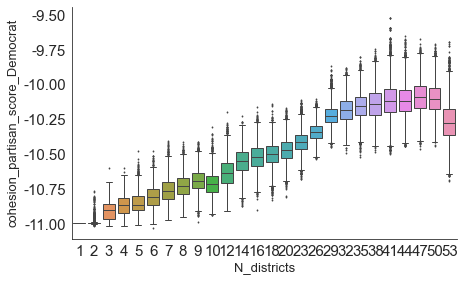

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


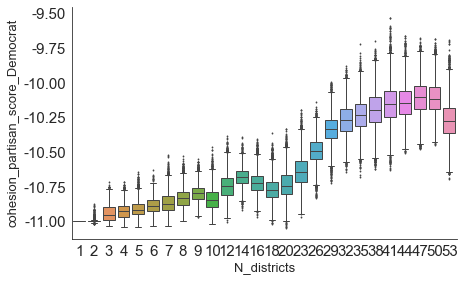

partisan_score Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


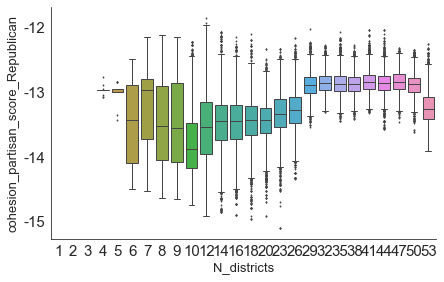

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


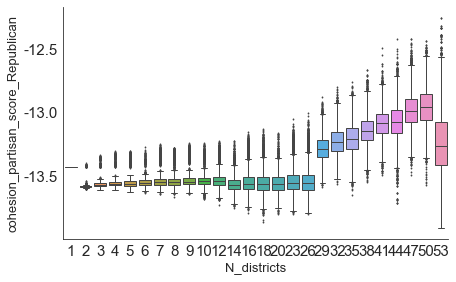

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


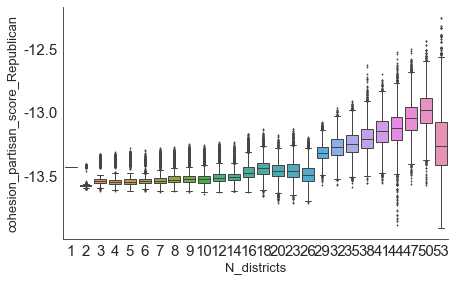

racial
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


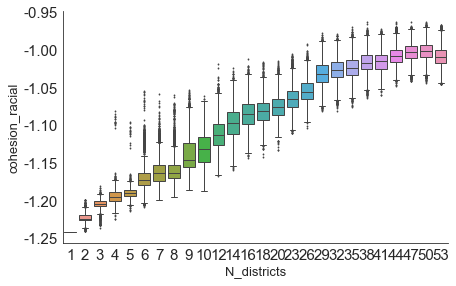

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


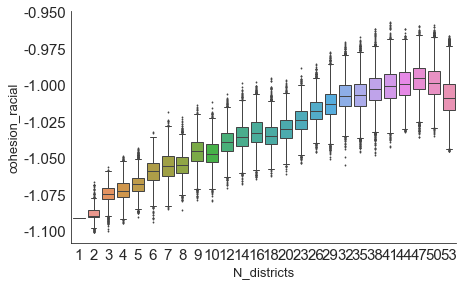

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


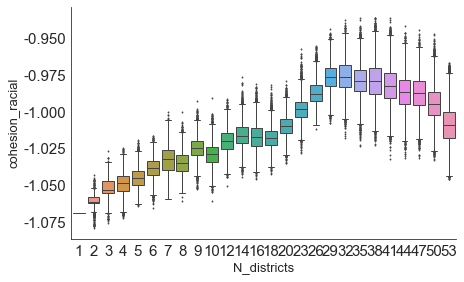

racial Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


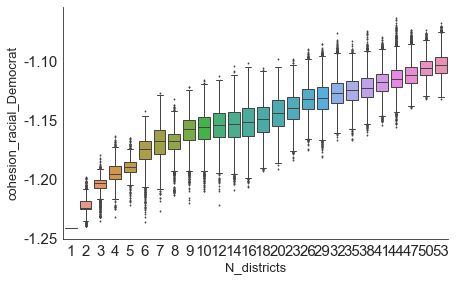

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


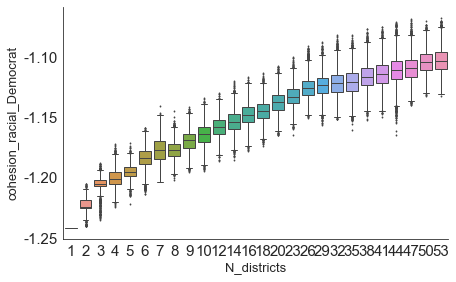

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


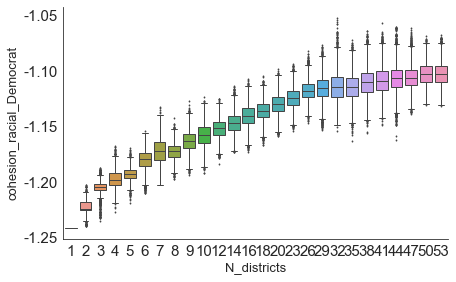

racial Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


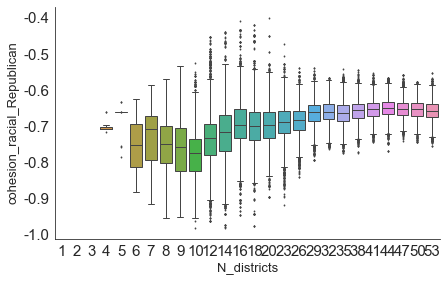

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


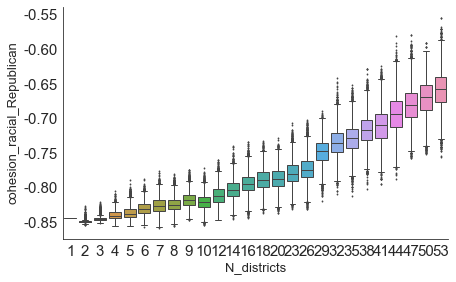

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


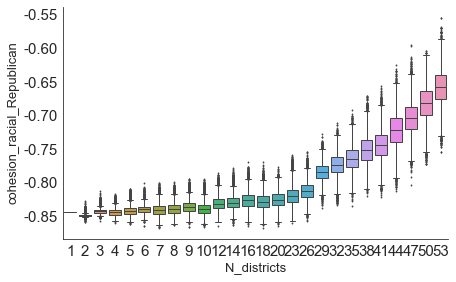

education
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


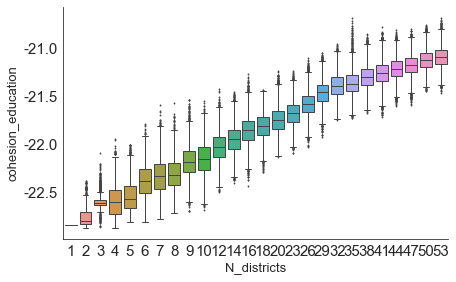

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


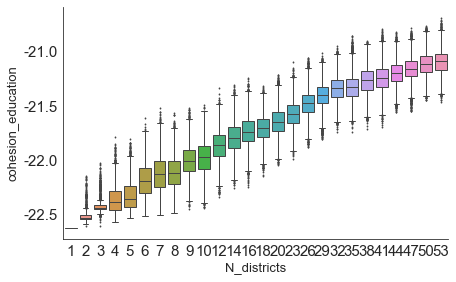

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


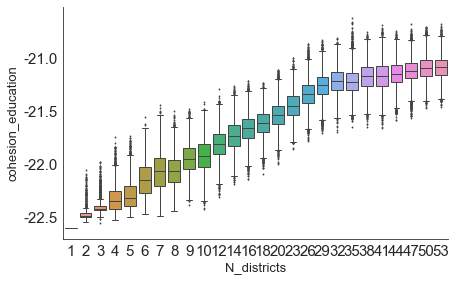

education Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


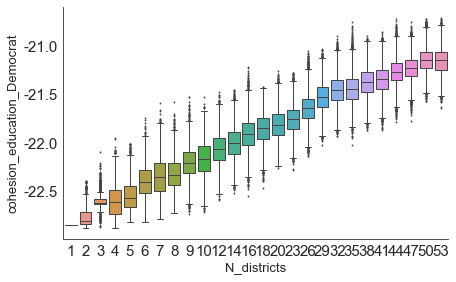

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


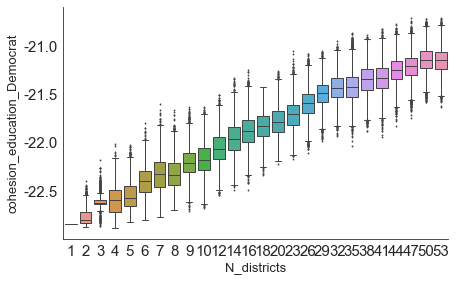

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


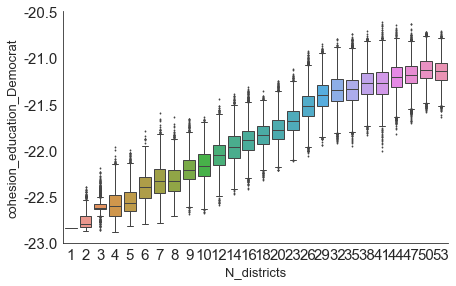

education Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


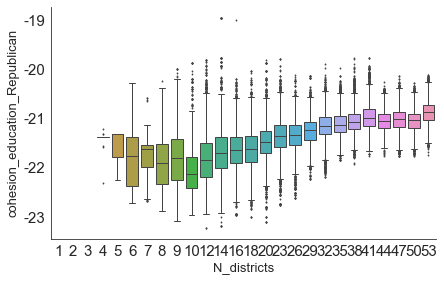

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


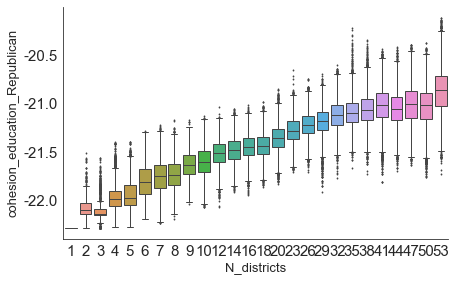

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


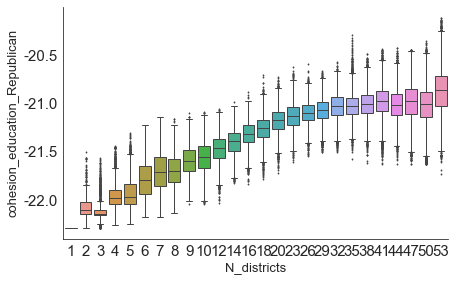

income
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


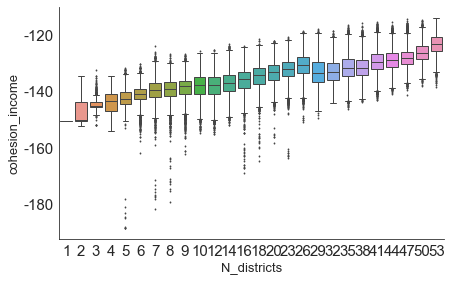

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


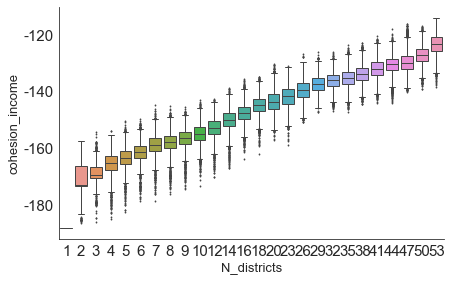

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


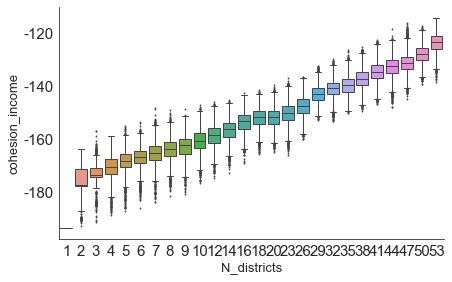

income Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


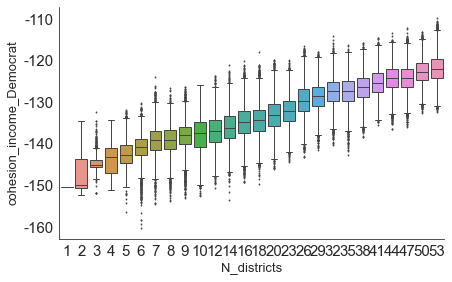

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


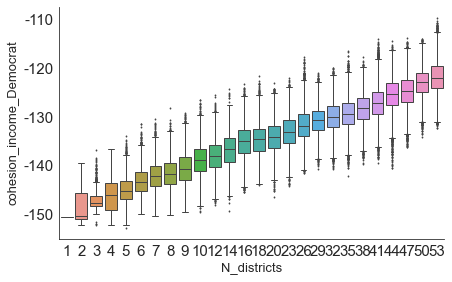

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


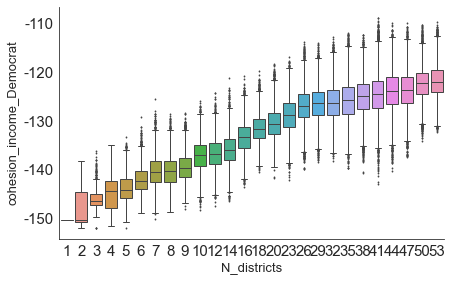

income Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


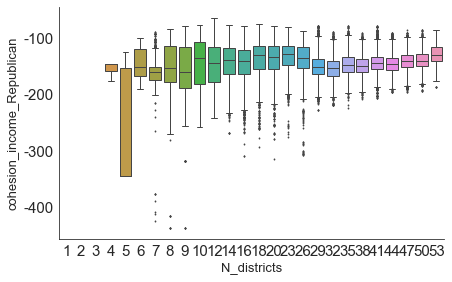

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


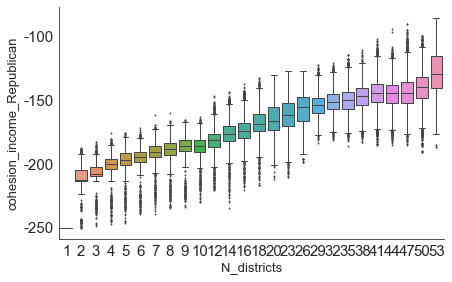

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


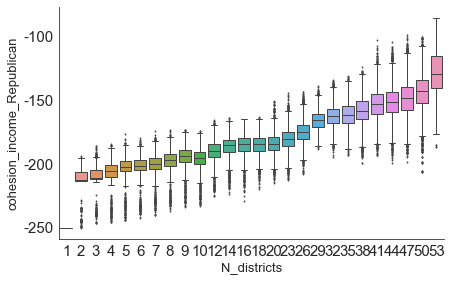

In [14]:
plot_all_for_one_state(df, 'CA')

In [15]:
plot_all_for_one_state(df, 'TX')

polarization
geographic
geographic Democrat
geographic Republican
partisan_score
partisan_score Democrat
partisan_score Republican
racial
racial Democrat
racial Republican
education
education Democrat
education Republican
income
income Democrat
income Republican


thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


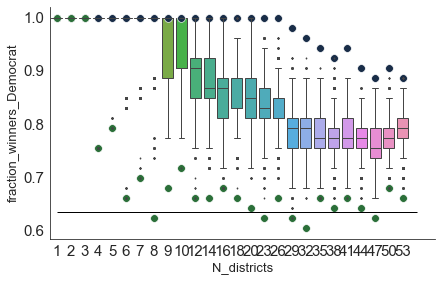

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


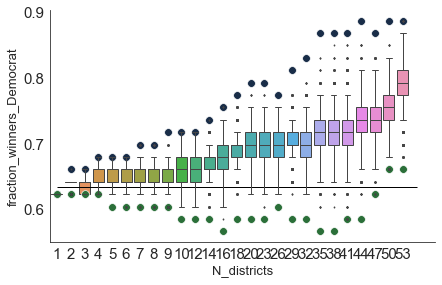

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


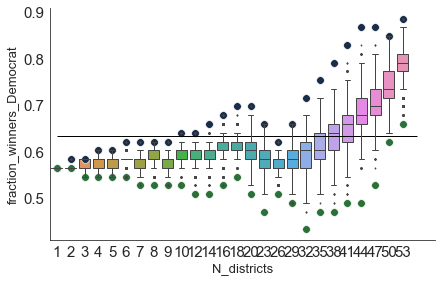

polarization
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


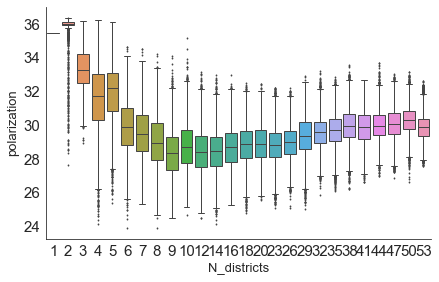

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


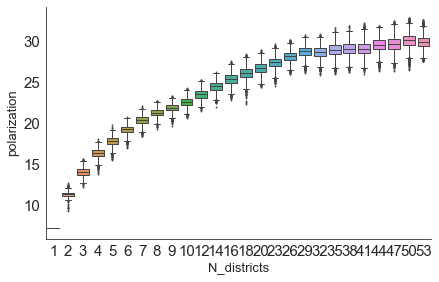

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


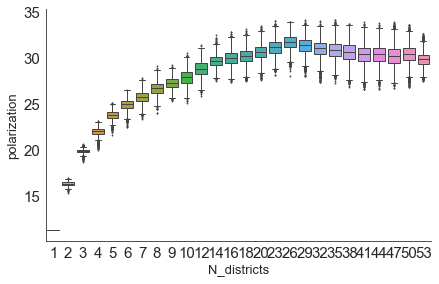

geographic
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


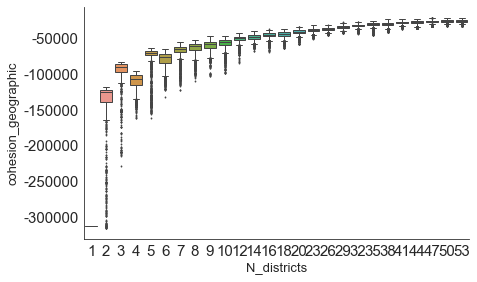

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


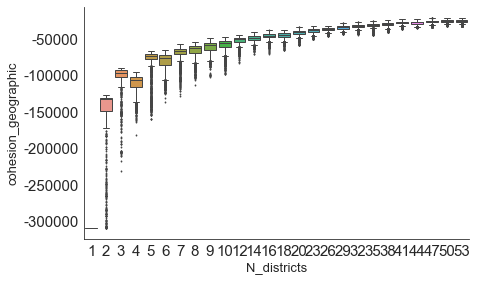

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


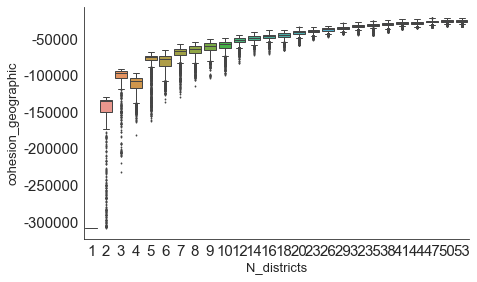

geographic Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


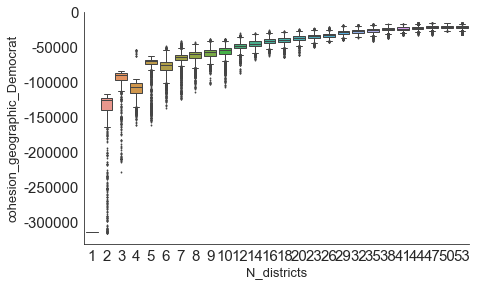

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


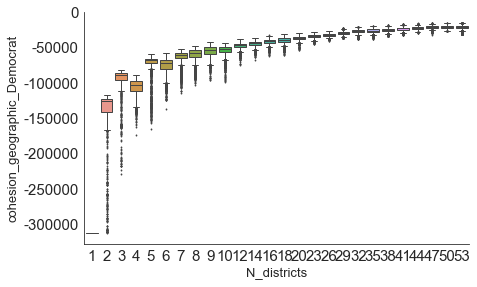

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


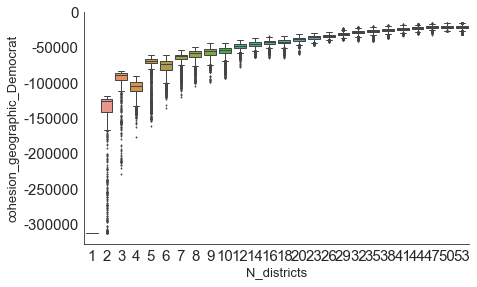

geographic Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


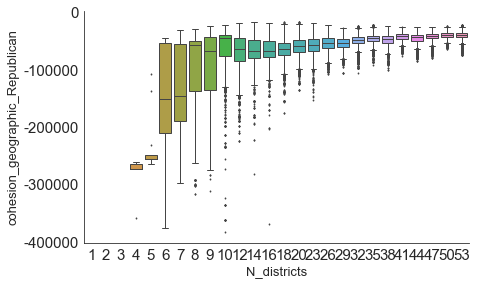

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


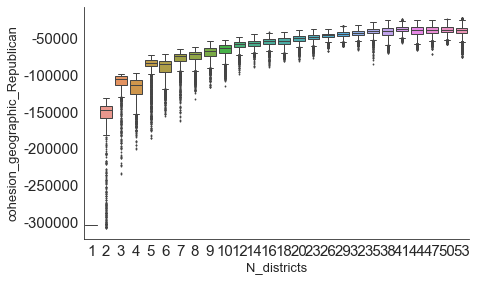

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


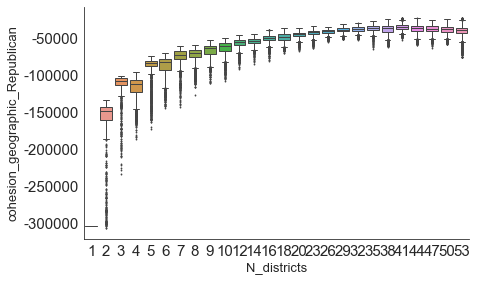

partisan_score
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


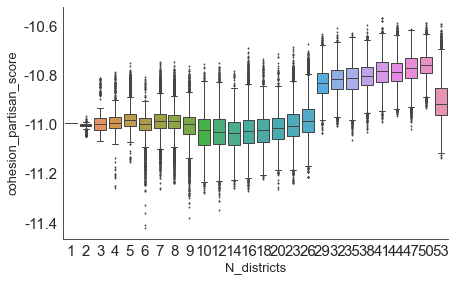

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


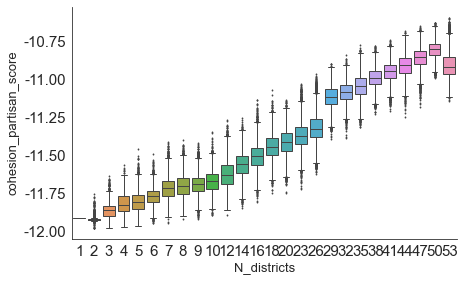

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


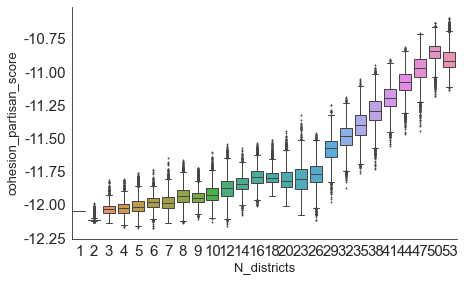

partisan_score Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


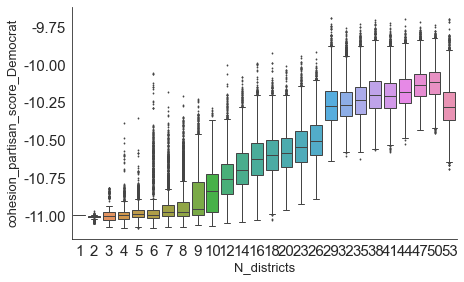

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


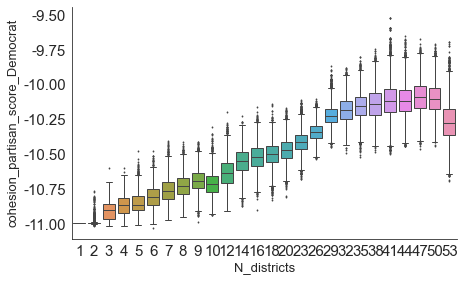

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


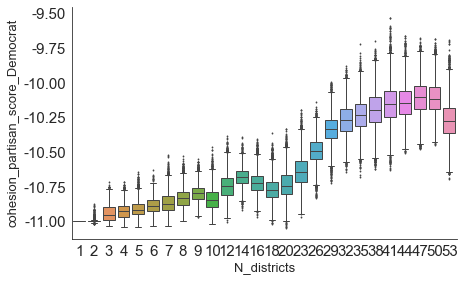

partisan_score Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


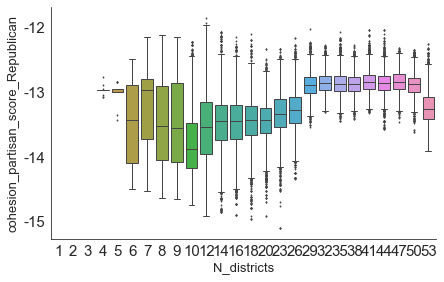

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


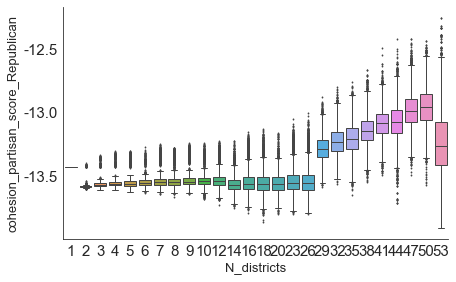

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


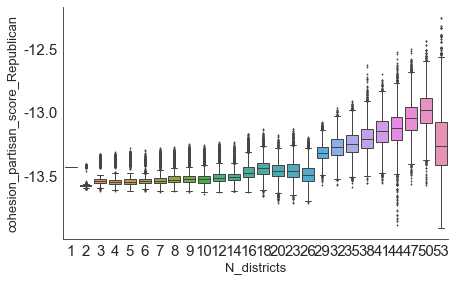

racial
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


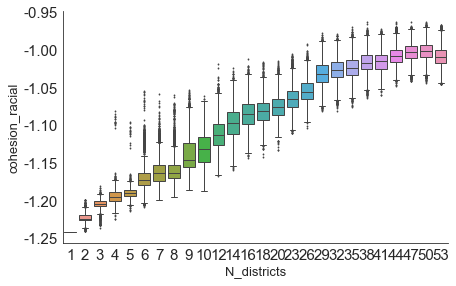

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


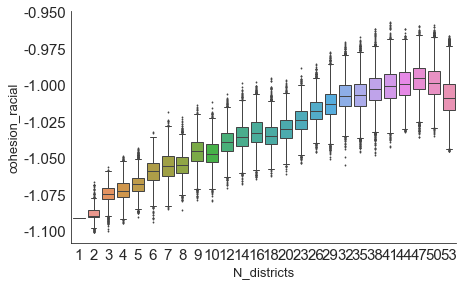

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


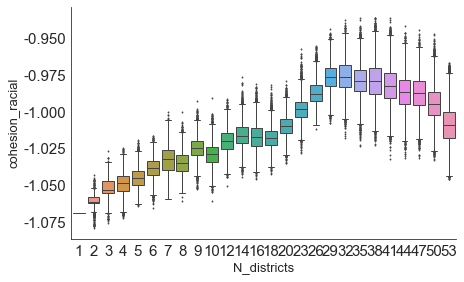

racial Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


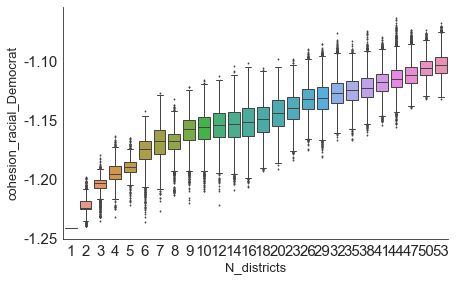

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


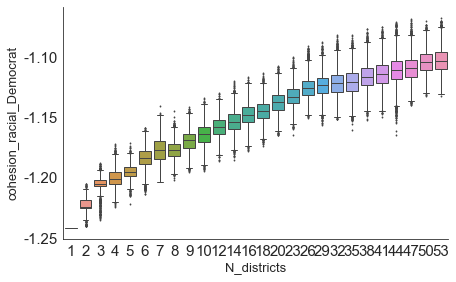

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


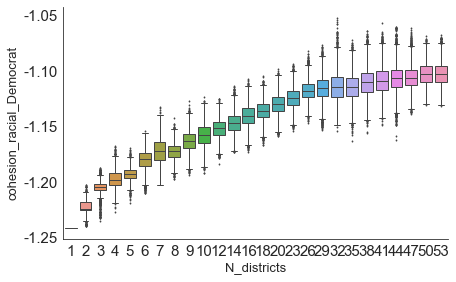

racial Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


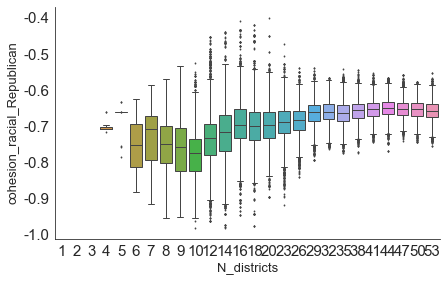

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


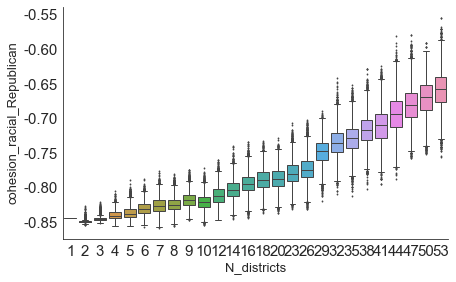

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


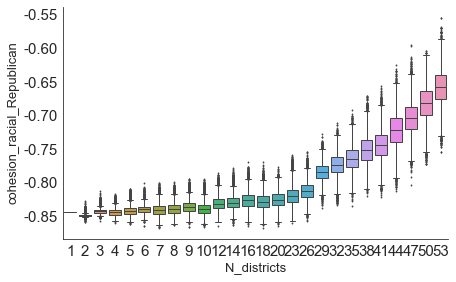

education
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


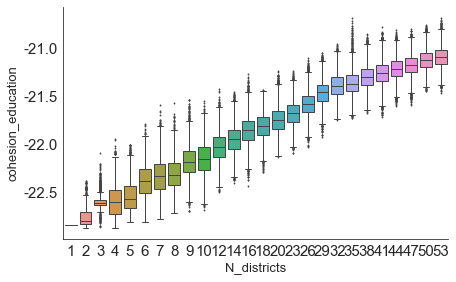

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


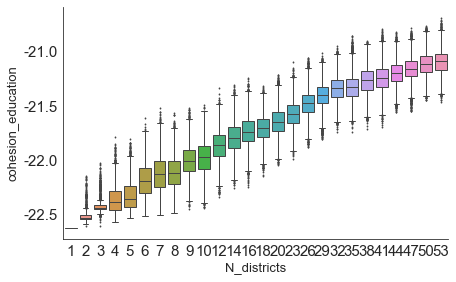

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


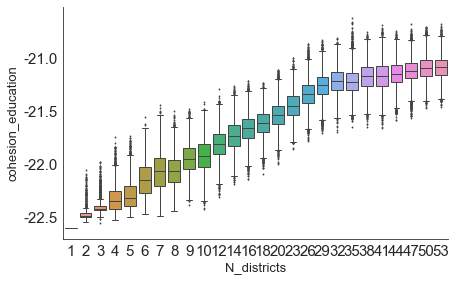

education Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


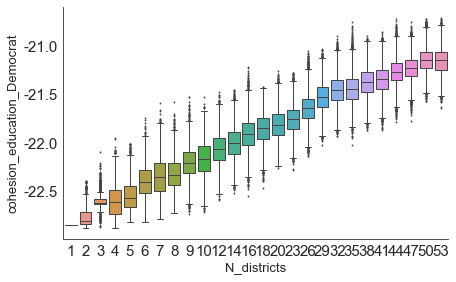

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


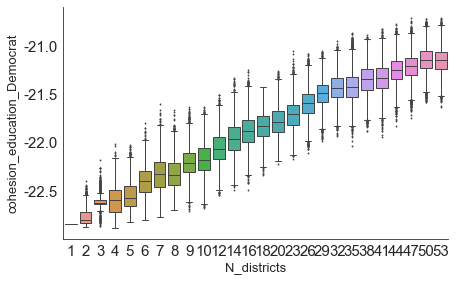

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


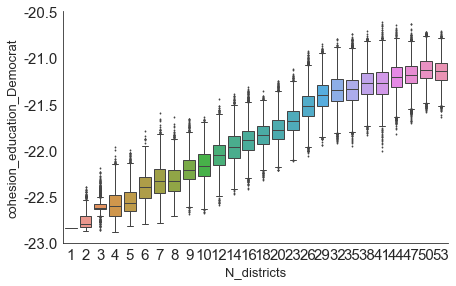

education Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


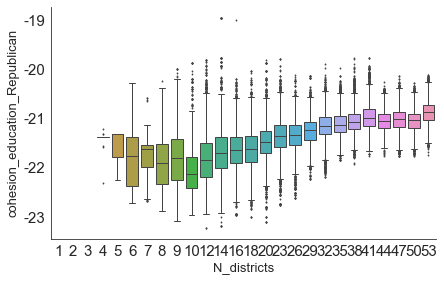

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


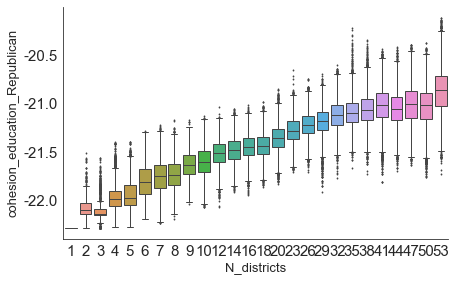

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


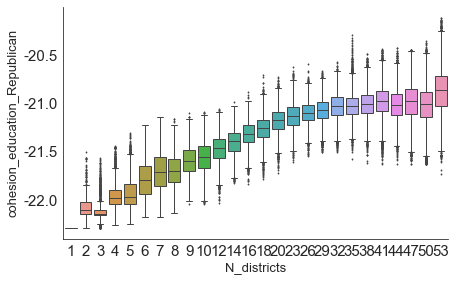

income
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


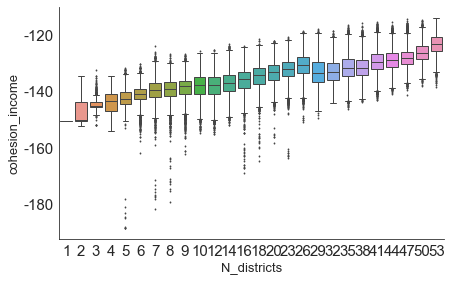

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


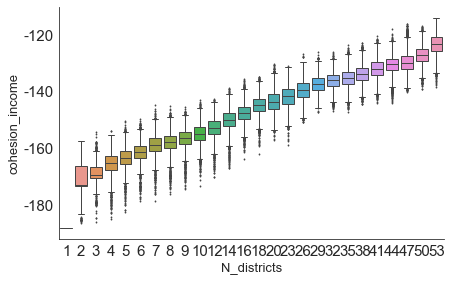

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


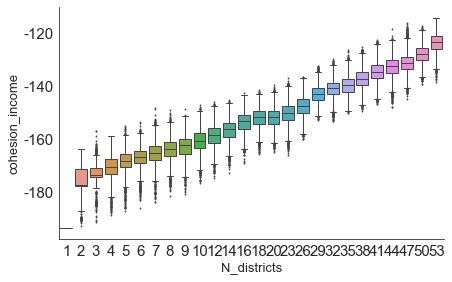

income Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


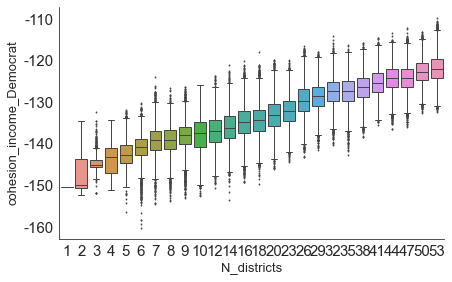

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


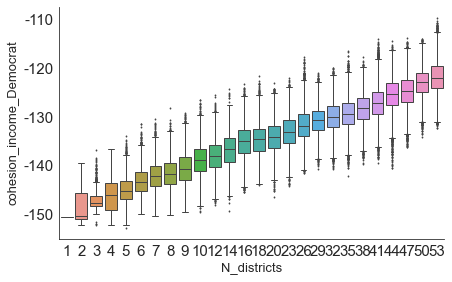

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


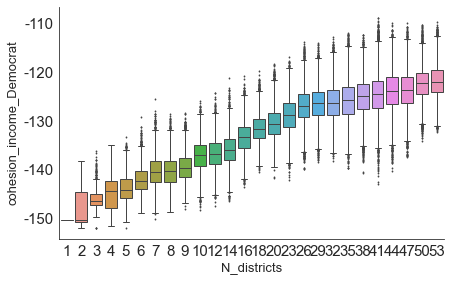

income Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


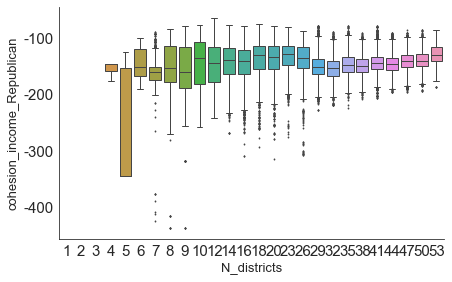

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


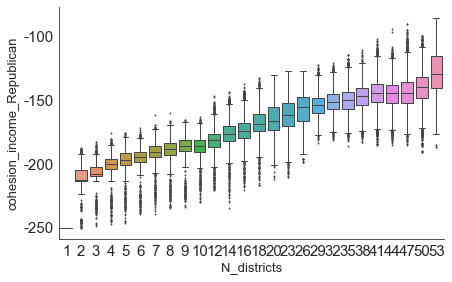

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


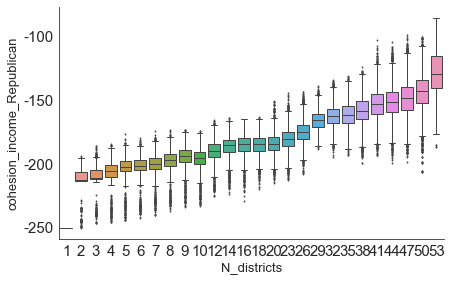

In [16]:
plot_all_for_one_state(df, 'CA')

thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


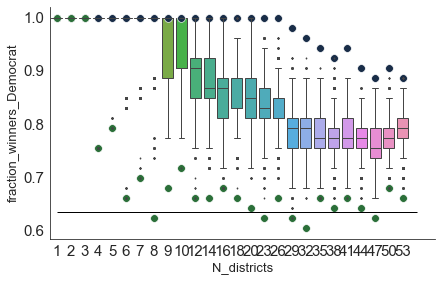

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


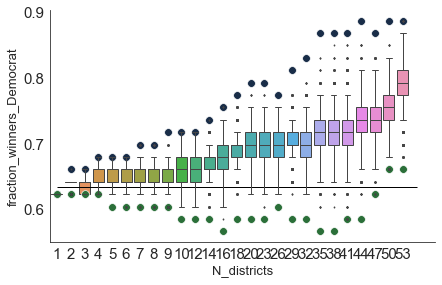

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
[0.6268 0.6357 0.633 ]


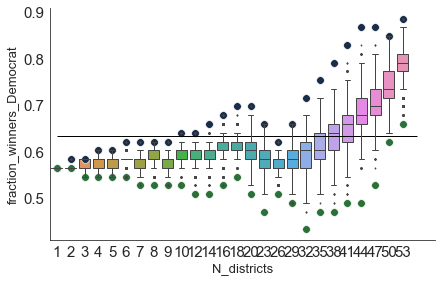

polarization
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


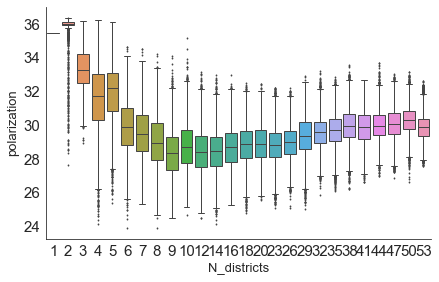

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


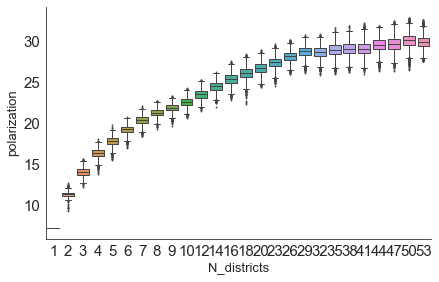

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


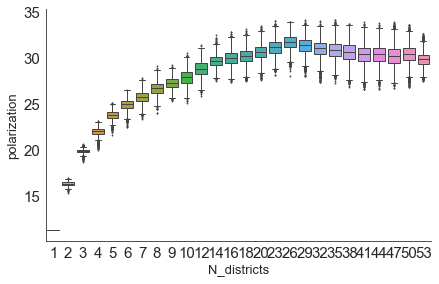

geographic
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


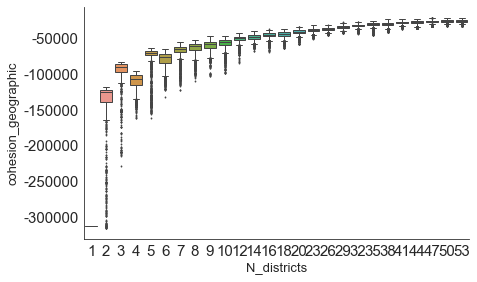

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


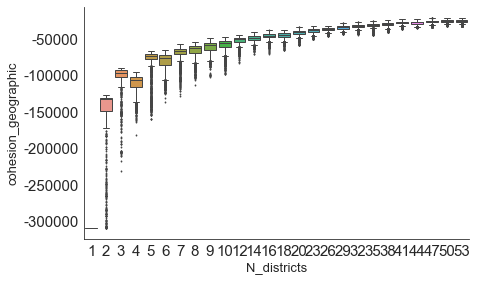

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


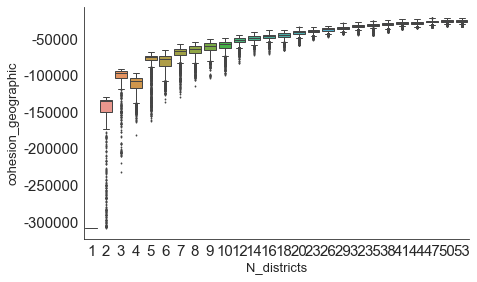

geographic Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


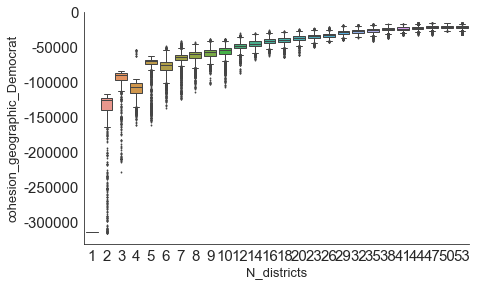

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


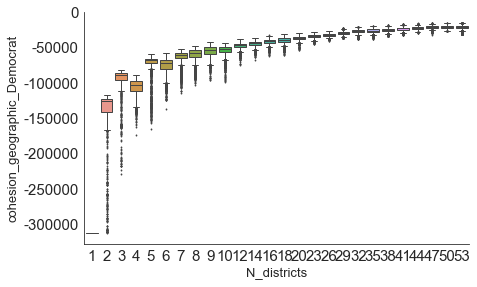

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


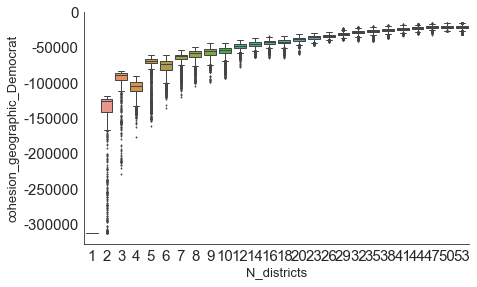

geographic Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


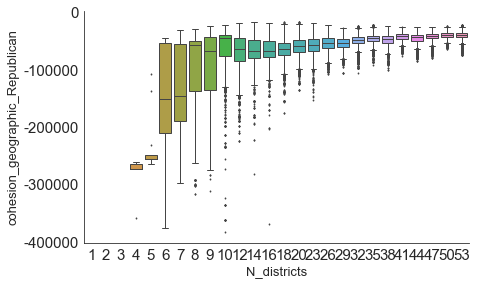

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


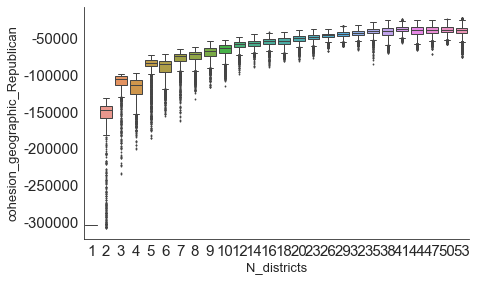

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


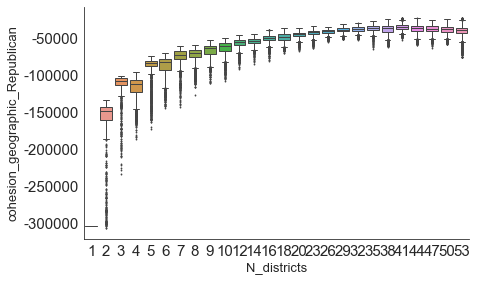

partisan_score
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


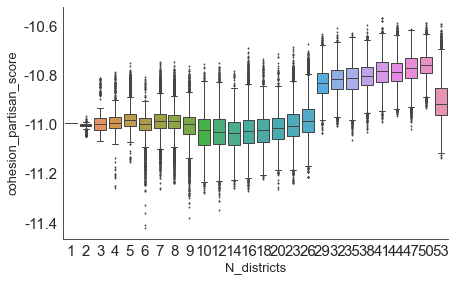

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


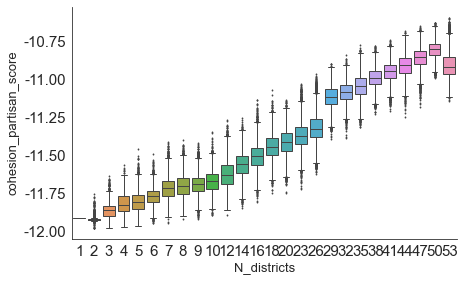

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


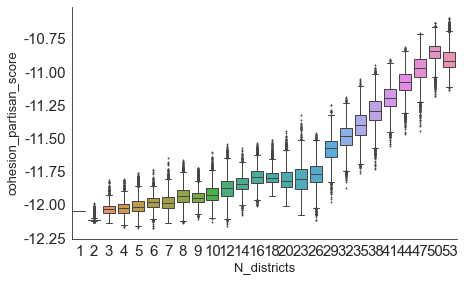

partisan_score Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


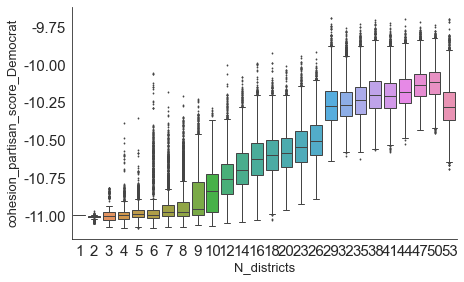

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


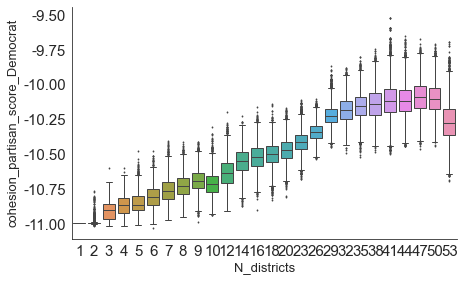

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


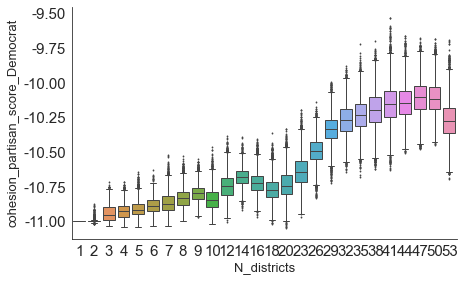

partisan_score Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


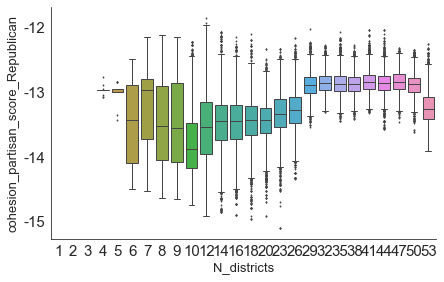

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


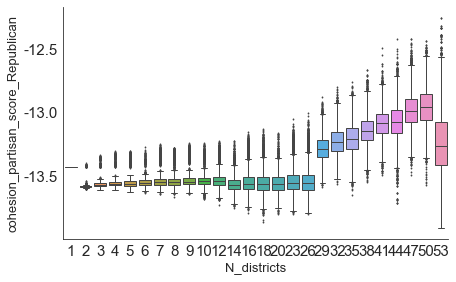

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


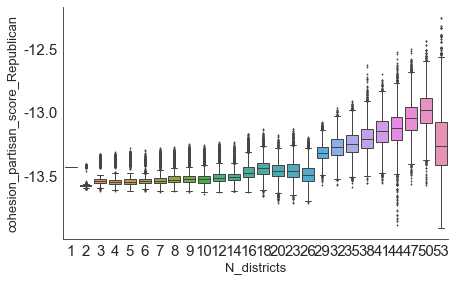

racial
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


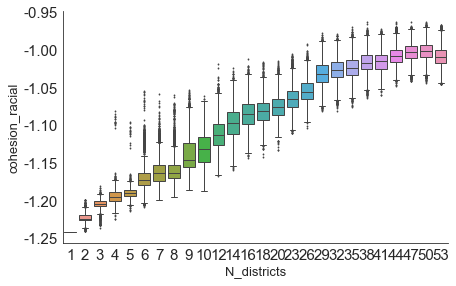

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


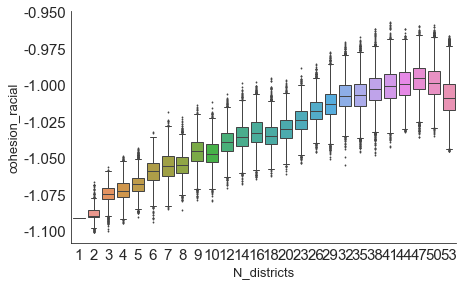

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


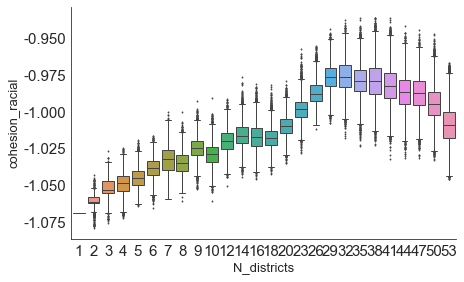

racial Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


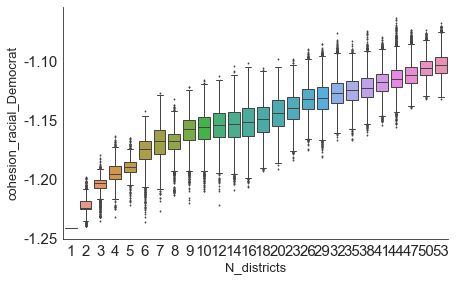

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


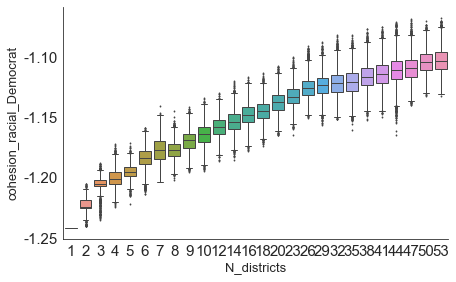

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


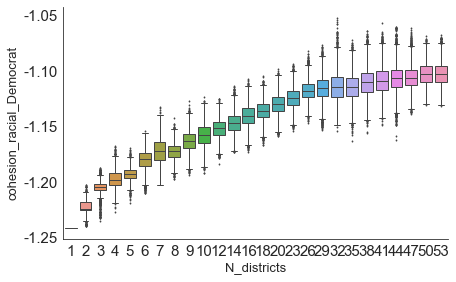

racial Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


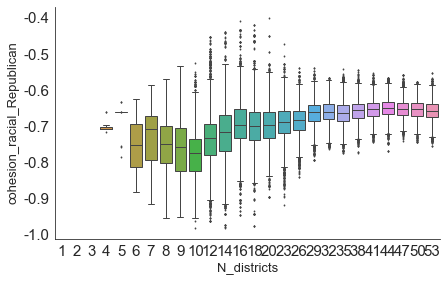

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


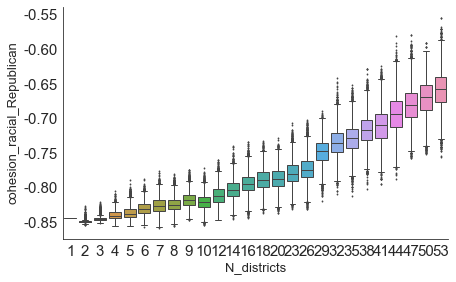

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


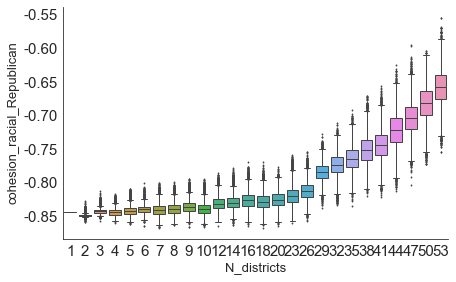

education
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


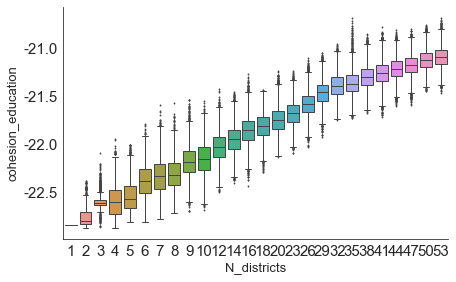

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


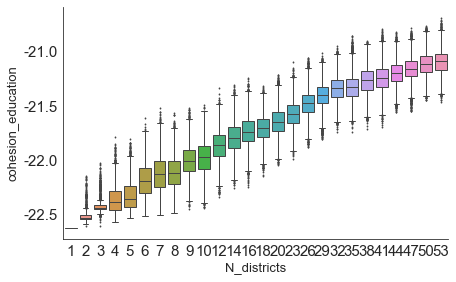

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


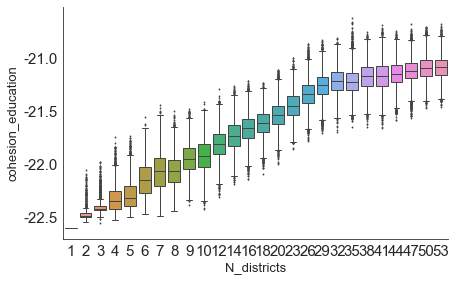

education Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


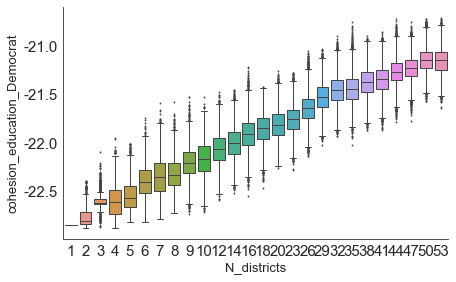

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


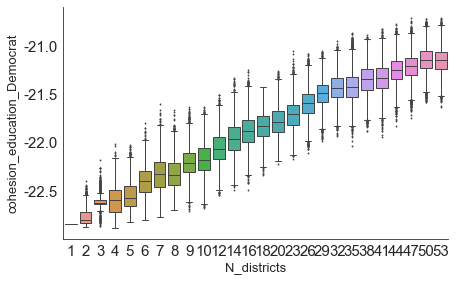

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


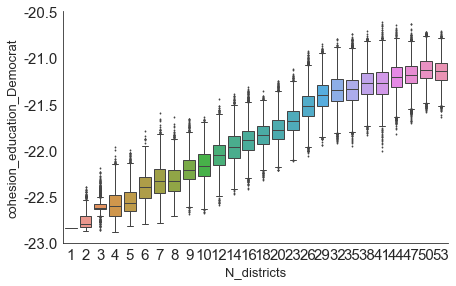

education Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


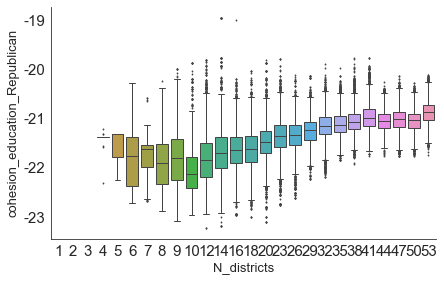

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


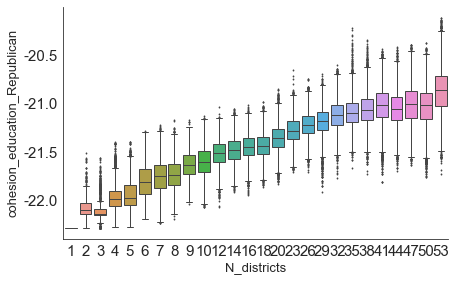

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


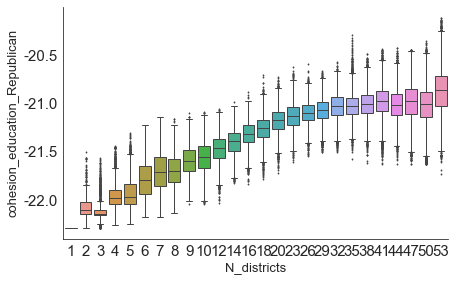

income
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


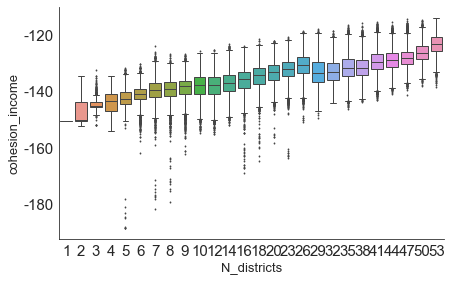

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


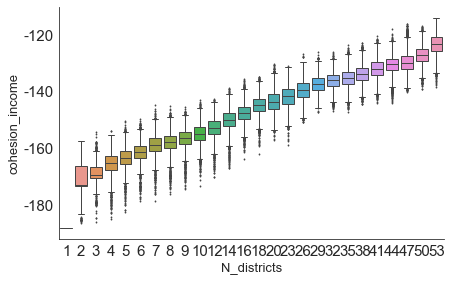

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


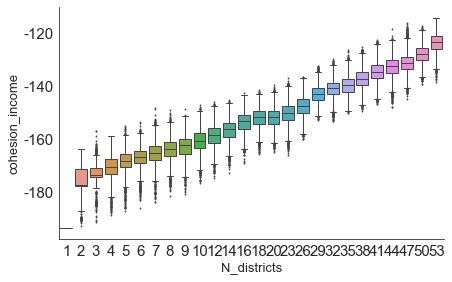

income Democrat
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


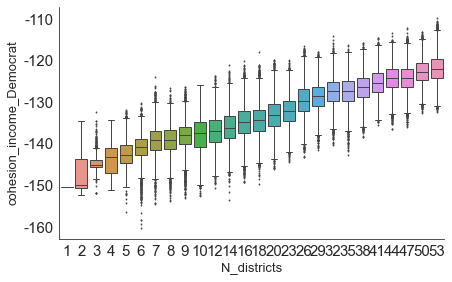

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


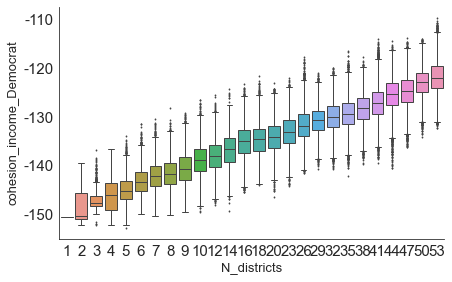

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


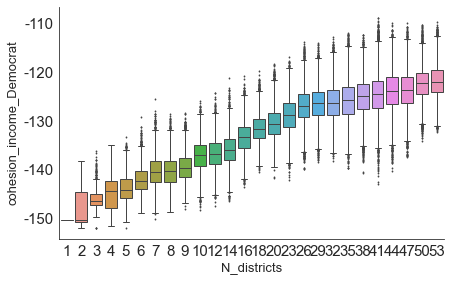

income Republican
thiele_approvalindependent
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


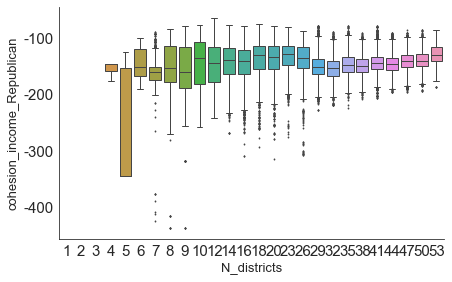

thiele_pav
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


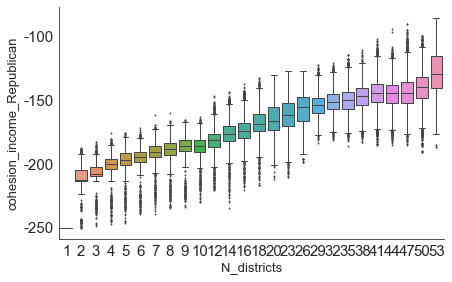

thiele_squared
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64


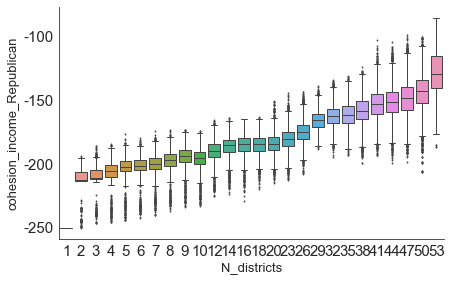

In [17]:
plot_all_for_one_state(df, 'CA')

In [18]:
plot_all_for_one_state(df, 'NC')

polarization
geographic
geographic Democrat
geographic Republican
partisan_score
partisan_score Democrat
partisan_score Republican
racial
racial Democrat
racial Republican
education
education Democrat
education Republican
income
income Democrat
income Republican
